In [45]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture


In [4]:
def get_stock_data(ticker, start_date, end_date):
    """
    指定されたティッカー、開始年月日、終了年月日に基づいて株価データを取得する関数。
    
    Parameters:
    ticker (str): 取得する株のティッカーシンボル。
    start_date (str): 取得するデータの開始年月日（形式: 'YYYY-MM-DD'）。
    end_date (str): 取得するデータの終了年月日（形式: 'YYYY-MM-DD'）。
    
    Returns:
    pd.DataFrame: 取得した株価データを含むデータフレーム。
    """
    # yfinanceを使用してデータを取得
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=start_date, end=end_date)
    
    return stock_data

In [2]:
symbol_list = ['GLD','GDX']

In [30]:
start_date = '2010-01-01'
end_date = '2023-12-31'

In [31]:
gld_data = get_stock_data('GLD',start_date,end_date)
gdx_data = get_stock_data('GDX',start_date,end_date)

In [32]:
gld_return = gld_data[['Close']].pct_change()
gdx_return = gdx_data[['Close']].pct_change()

In [33]:
gld_return.rename(columns={'Close': 'gld'}, inplace=True)
gdx_return.rename(columns={'Close': 'gdx'}, inplace=True)

In [34]:
df_return = pd.merge(gld_return, gdx_return, left_index=True, right_index=True)

In [35]:
df_return.dropna(inplace=True)

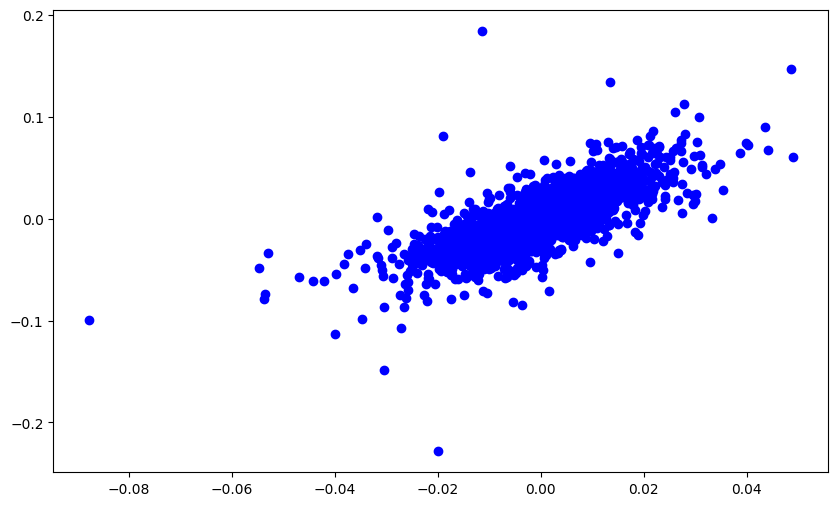

In [36]:
# 2次元プロット
plt.figure(figsize=(10, 6))
plt.scatter(df_return['gld'], df_return['gdx'], color='blue')

In [37]:
gld_data['price'] = gld_data['Close']/gld_data['Close'].iloc[0]
gdx_data['price'] = gdx_data['Close']/gdx_data['Close'].iloc[0]

In [41]:
gld_data.rename(columns={'price': 'gld'}, inplace=True)
gdx_data.rename(columns={'price': 'gdx'}, inplace=True)

In [43]:
df_price = pd.merge(gld_data[['gld']], gdx_data[['gdx']], left_index=True, right_index=True)

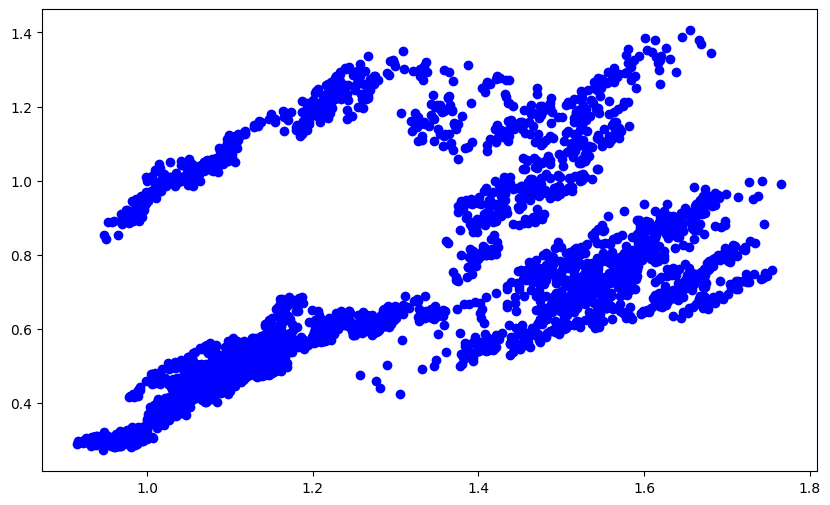

In [44]:
# 2次元プロット
plt.figure(figsize=(10, 6))
plt.scatter(df_price['gld'], df_price['gdx'], color='blue')

In [48]:
# クラスタリング手法のパラメータ
n_clusters = 4  # クラスタの数

# 1. K-Means法によるクラスタリング
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_price['KMeans_cluster'] = kmeans.fit_predict(df_price[['gld', 'gdx']])

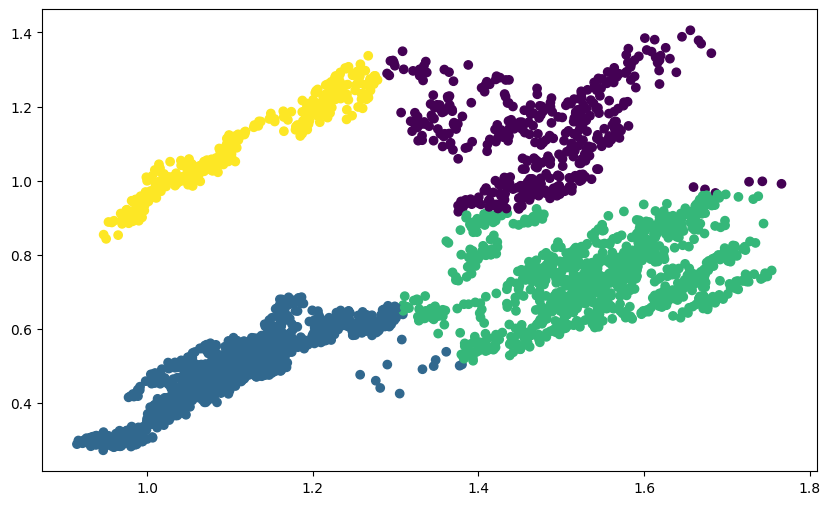

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df_price['gld'], df_price['gdx'], c=df_price['KMeans_cluster'], cmap='viridis')

In [66]:
# 2. 混合ガウス分布をEMアルゴリズムでフィッティング
gmm = GaussianMixture(n_components=5, random_state=42)
df_price['GMM_cluster'] = gmm.fit_predict(df_price[['gld', 'gdx']])

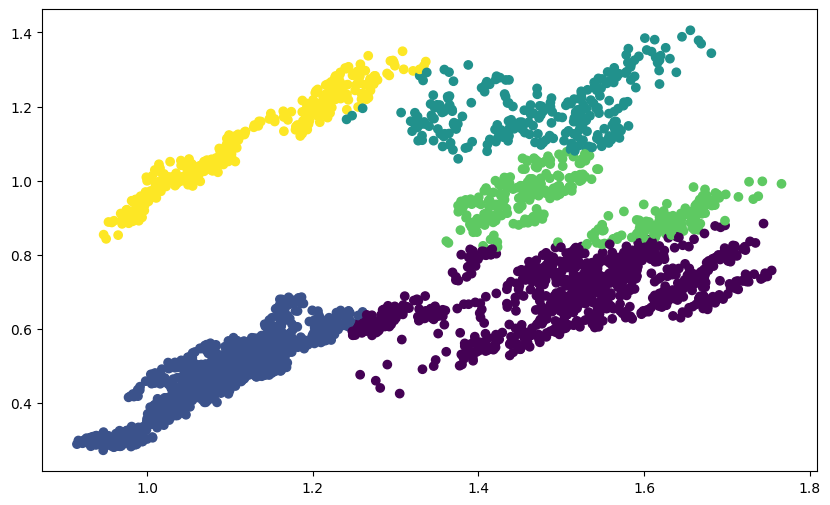

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(df_price['gld'], df_price['gdx'], c=df_price['GMM_cluster'], cmap='viridis')

In [64]:

# 3. 混合ガウス分布を変分ベイズ法でフィッティング
bgm = BayesianGaussianMixture(n_components=5, random_state=42)
df_price['BGM_cluster'] = bgm.fit_predict(df_price[['gld', 'gdx']])

/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/mixture/_base.py:286: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


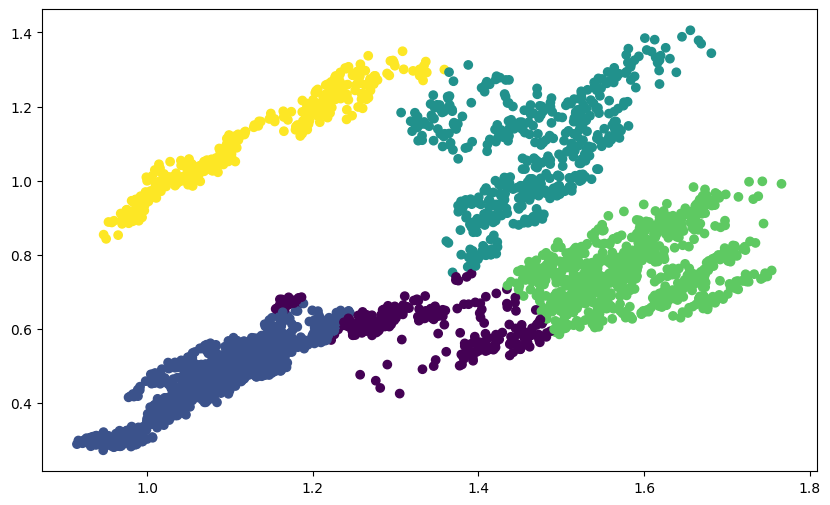

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df_price['gld'], df_price['gdx'], c=df_price['BGM_cluster'], cmap='viridis')